In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import scipy
import IPython
import IPython.parallel
import psutil

C:\Users\lenovo\Anaconda3\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
df = pd.read_excel("C:\\Users\\lenovo\\Desktop\\PROJECTS\\KODLAR\\Diger\\Titanic.xlsx")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,45839.0,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.0,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,42863.0,NaN,S


In [4]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.groupby("Survived").count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [7]:
survived_col = df.Survived

In [8]:
survived_col.mean()

0.3838383838383838

In [9]:
target = survived_col.values

In [10]:
target[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [11]:
target = target.astype("int32")
target.dtype

dtype('int32')

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
numerical_features = df[["Fare","Pclass","Age"]]
numerical_features.count()

Fare      891
Pclass    891
Age       714
dtype: int64

In [14]:
median_values = numerical_features.dropna().median()
median_values

Fare      42751.0
Pclass        2.0
Age          28.0
dtype: float64

In [15]:
inputed_features = numerical_features.fillna(median_values)
inputed_features.head(10)

,Fare,Pclass,Age
0,45839.0,3,22.0
1,712833.0,1,38.0
2,7925.0,3,26.0
3,53.1,1,35.0
4,42863.0,3,35.0
5,84583.0,3,28.0
6,518625.0,1,54.0
7,21075.0,3,2.0
8,111333.0,3,27.0
9,300708.0,2,14.0


In [16]:
features_array = inputed_features.values 
features_array.shape

(891, 3)

In [17]:
features_array.dtype

dtype('float64')

In [18]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features_array, target, 
                                                   train_size = .7, 
                                                   random_state = 0)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
X_train.shape

(623, 3)

In [20]:
X_test.shape

(268, 3)

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, Y_train)

In [22]:
Y_pred = clf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred, Y_test)

0.67910447761194026

In [24]:
clf.score(X_test, Y_test)

0.67910447761194026

In [25]:
feature_names = numerical_features.columns
feature_names

Index(['Fare', 'Pclass', 'Age'], dtype='object')

In [26]:
clf.coef_

array([[  1.47191458e-06,  -1.80526350e-02,  -2.06997204e-02]])

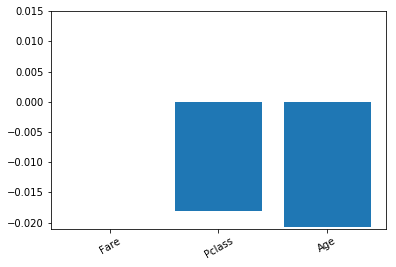

In [27]:
import matplotlib.pyplot as plt
x = np.arange(len(feature_names))
plt.bar(x, clf.coef_.ravel())
plt.xticks(x, feature_names, rotation = 30)
plt.ylim([-.021, .015])
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[163,   5],
       [ 81,  19]], dtype=int64)

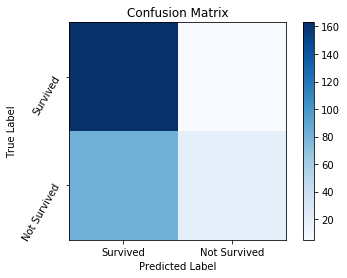

In [29]:
def plot_confusion(cm, target_names = ["Survived", "Not Survived"],
                  title = "Confusion Matrix"):
    plt.imshow(cm, interpolation="nearest", cmap = plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.yticks(tick_marks, target_names, rotation = 60)
    plt.xticks(tick_marks, target_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout
plot_confusion(cm)

In [30]:
sum = cm.sum(axis = 1).reshape(-1,1)
sum

array([[168],
       [100]], dtype=int64)

In [31]:
cm_normalized = cm.astype(np.float64) / cm.sum(axis = 1).reshape(-1,1)
cm_normalized

array([[ 0.9702381,  0.0297619],
       [ 0.81     ,  0.19     ]])

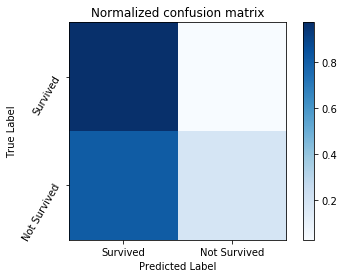

In [32]:
plot_confusion(cm_normalized, title = "Normalized confusion matrix")
plt.show()

In [33]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, target_names = ["Not Survived",
                                                           "Survived"]))

              precision    recall  f1-score   support

Not Survived       0.67      0.97      0.79       168
    Survived       0.79      0.19      0.31       100

 avg / total       0.71      0.68      0.61       268



In [34]:
target_predicted_proba = clf.predict_proba(X_test)
target_predicted_proba[:5]

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([[ 0.60402124,  0.39597876],
       [ 0.64685089,  0.35314911],
       [ 0.53929355,  0.46070645],
       [ 0.1739764 ,  0.8260236 ],
       [ 0.6061977 ,  0.3938023 ]])

In [35]:
target_predicted_proba[:,1]

array([ 0.39597876,  0.35314911,  0.46070645,  0.8260236 ,  0.3938023 ,
        0.36915716,  0.80399974,  0.85391469,  0.69077604,  0.37083065,
        0.38271126,  0.29621498,  0.35560918,  0.45455645,  0.66992828,
        0.44283618,  0.37332339,  0.39396912,  0.32808261,  0.51529378,
        0.41413007,  0.38354321,  0.37257794,  0.35459272,  0.40949227,
        0.30002979,  0.35396811,  0.38455121,  0.36473468,  0.49160824,
        0.35181821,  0.26711487,  0.36078227,  0.35459423,  0.36538796,
        0.35009238,  0.2847255 ,  0.36495626,  0.36473025,  0.23954382,
        0.22076191,  0.36300878,  0.36078397,  0.55944245,  0.34955693,
        0.37312278,  0.37312278,  0.49855837,  0.30054841,  0.25055896,
        0.35459238,  0.60757288,  0.4699904 ,  0.41762134,  0.36917773,
        0.36956046,  0.21370949,  0.44099294,  0.45037195,  0.34637124,
        0.40024206,  0.34870379,  0.50371716,  0.35459561,  0.38924422,
        0.33687044,  0.34253993,  0.35047285,  0.48031543,  0.39

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(Y_test, target_predicted_proba):
    fpr, tpr, threshold = roc_curve(Y_test, target_predicted_proba[:,1])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label= "Roc curve (area = {})".format(roc_auc))
    plt.plot([0,1], [0,1] , "k-")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate or (Sensitivity)")
    plt.xlabel("False Positive Rate or (1 - Specifity)")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc = "best")
    plt.show()

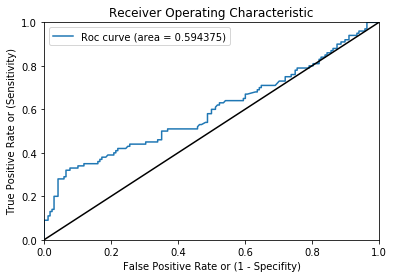

In [41]:
plot_roc_curve(Y_test, target_predicted_proba)

# Roc Curve Explanation
- Accurracy : (TP +  TN)/total
- Misclassification rate : (FN + FP)/total => equivalent to (1-accuracy)
- True Positive Rate : TP/(TP + FN) => Sensitivity or Recall
- False Positive Rate : FP/(FP + TN)
- True Negative Rate : TN/(FP + TN) => Specifity
- Specificity : (TN/Actual No) => (1 - False Positive Rate)
- Precision : (TP/Predicted)
- Prevalence : Actual Yes/ Total
- Other Terms worth mentionning:
    - Positive Predicted Value (PPV) : if Prevalence = %50 it is equal to Prevalence
    - F Score : It is a weighted average of the true positive rate (recall) and precision.
    - ROC curve : (y-axis) => True Positive Rate
                  (x-axis) => False Positive Rate 

In [285]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features_array, target, 
                                                   train_size = .8,
                                                   random_state = 0)
clf.fit(X_train, Y_train).score(X_test, Y_test)

0.67039106145251393

In [286]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(clf, features_array, target, cv = 5)
scores

array([ 0.62011173,  0.66480447,  0.67977528,  0.66853933,  0.65536723])

In [287]:
scores = cross_val_score(clf, features_array, target, cv = 10, 
                        scoring =  "f1")
scores

array([ 0.27906977,  0.17777778,  0.27906977,  0.4       ,  0.15789474,
        0.40909091,  0.21052632,  0.41666667,  0.33333333,  0.34782609])

In [44]:
df[["Sex", "Embarked"]].head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [48]:
pd.get_dummies(df["Sex"], prefix="Sex").head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [51]:
pd.get_dummies(df["Embarked"], prefix="Embarked").head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [62]:
factors, labels = pd.factorize(df["Embarked"])
factors[:10]

array([0, 1, 0, 0, 0, 2, 0, 0, 0, 1], dtype=int64)

In [67]:
labels.value_counts()

C    1
Q    1
S    1
dtype: int64

In [101]:
rich_features = pd.concat([df[["Fare", "Pclass", "Age"]],
                         pd.get_dummies(df["Sex"], prefix="Sex"),
                         pd.get_dummies(df["Embarked"], prefix="Embarked")], axis = 1)
rich_features.head()

,Fare,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,45839.0,3,22.0,0,1,0,0,1
1,712833.0,1,38.0,1,0,1,0,0
2,7925.0,3,26.0,1,0,0,0,1
3,53.1,1,35.0,1,0,0,0,1
4,42863.0,3,35.0,0,1,0,0,1


In [102]:
rich_features = rich_features.drop("Sex_female", axis = 1)
rich_features.head()

,Fare,Pclass,Age,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,45839.0,3,22.0,1,0,0,1
1,712833.0,1,38.0,0,1,0,0
2,7925.0,3,26.0,0,0,0,1
3,53.1,1,35.0,0,0,0,1
4,42863.0,3,35.0,1,0,0,1


In [103]:
rich_features.head()

,Fare,Pclass,Age,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,45839.0,3,22.0,1,0,0,1
1,712833.0,1,38.0,0,1,0,0
2,7925.0,3,26.0,0,0,0,1
3,53.1,1,35.0,0,0,0,1
4,42863.0,3,35.0,1,0,0,1


In [104]:
rich_features.count()
rich_features.dtypes

Fare          float64
Pclass          int64
Age           float64
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [105]:
median_values = numerical_features.dropna().median()
rich_features = rich_features.fillna(median_values)
rich_features.head()
rich_features.count()


Fare          891
Pclass        891
Age           891
Sex_male      891
Embarked_C    891
Embarked_Q    891
Embarked_S    891
dtype: int64

In [91]:
rich_features.shape

(891, 7)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV

In [97]:

clf_base = LogisticRegression()

# Randomized Search CV
grid = { "C" : 10.0 ** np.arange(-2,3),
       "penalty" : ["l1", "l2"]}
cv = KFold(rich_features.shape[0], n_folds = 5, shuffle = True, random_state = 0)
gs = GridSearchCV(clf_base, param_grid=grid, cv = cv)
gs.fit(rich_features, target)
print(gs.best_params_, gs.best_score_)

{'C': 1.0, 'penalty': 'l1'} 0.7934904601571269


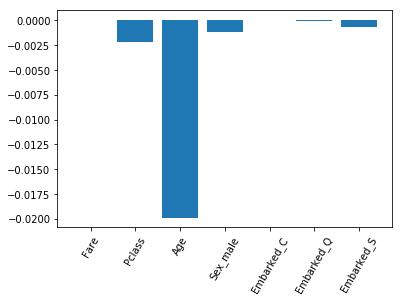

array([[  1.46100008e-06,  -2.17161061e-03,  -1.98875602e-02,
         -1.15002770e-03,   4.42644301e-05,  -4.09781553e-05,
         -6.21314224e-04]])

In [109]:
logreg = LogisticRegression(C = 1).fit(rich_features, target)
x = np.arange(len(rich_features.columns.values))
plt.bar(x, logreg.coef_.ravel())
plt.xticks(x, rich_features.columns.values, rotation = 60)
plt.show()
logreg.coef_

# ENSEMBLE OF RANDOMIZED TREES

In [121]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(rich_features, target, 
                                                   train_size = .7,
                                                   random_state = 0)

rf = RandomForestClassifier()
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 3),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
             "n_estimators" : [100],
             "n_jobs" : [1,4]}
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=20)
random_search.fit(X_train, Y_train)
print(random_search.best_params_, random_search.best_score_)
Y_true, Y_pred = Y_test, random_search.predict(X_test)
print(classification_report(Y_true, Y_pred, target_names=["Not Survived", "Survived"]))
print(confusion_matrix(Y_true, Y_pred))

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 6, 'min_samples_split': 7, 'n_estimators': 100, 'n_jobs': 1} 0.815409309791
              precision    recall  f1-score   support

Not Survived       0.82      0.91      0.86       168
    Survived       0.82      0.67      0.74       100

 avg / total       0.82      0.82      0.82       268

[[153  15]
 [ 33  67]]


In [135]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

params = {"n_estimators": [100, 200],
         "learning_rate": [.1,.5],
         "subsample": [.8, 1.],
         "max_features": [None, .5]}
rs = RandomizedSearchCV(gb,params, n_iter=16)
rs.fit(X_train, Y_train)
print(rs.best_params_, rs.best_score_)
Y_true, Y_pred = Y_test, rs.predict(X_test)
print(classification_report(Y_true, Y_pred))
print(confusion_matrix(Y_true, Y_pred))

{'subsample': 0.8, 'n_estimators': 100, 'max_features': None, 'learning_rate': 0.1} 0.810593900482
             precision    recall  f1-score   support

          0       0.85      0.90      0.88       168
          1       0.82      0.74      0.78       100

avg / total       0.84      0.84      0.84       268

[[152  16]
 [ 26  74]]


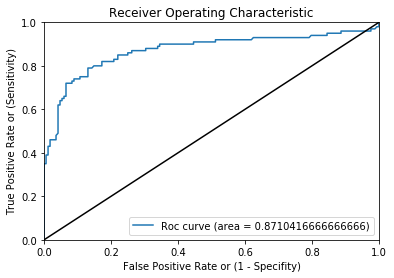

In [140]:
target_predicted_proba = rs.predict_proba(X_test)
plot_roc_curve(Y_test, target_predicted_proba)

# AVOIDING DATA SNOOPING WITH PIPELINE

In [146]:
features = pd.concat([df[["Fare", "Age"]], 
                     pd.get_dummies(df["Sex"], prefix="Sex"),
                    pd.get_dummies(df["Pclass"], prefix="Pclass"), 
                    pd.get_dummies(df["Embarked"], prefix ="Embarked")],
                    axis = 1)
features = features.drop("Sex_male", axis= 1)
features.fillna(-1, inplace=True)
features.count()

Fare          891
Age           891
Sex_female    891
Pclass_1      891
Pclass_2      891
Pclass_3      891
Embarked_C    891
Embarked_Q    891
Embarked_S    891
dtype: int64

In [148]:
features.head()

,Fare,Age,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,45839.0,22.0,0,0,0,1,0,0,1
1,712833.0,38.0,1,1,0,0,1,0,0
2,7925.0,26.0,1,0,0,1,0,0,1
3,53.1,35.0,1,1,0,0,0,0,1
4,42863.0,35.0,0,0,0,1,0,0,1


In [150]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features.values,target, 
                                                   train_size = .7, 
                                                   random_state = 0)


In [152]:
from sklearn.preprocessing import Imputer 

imputer = Imputer(strategy = "median", missing_values= -1)
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values=-1, strategy='median', verbose=0)

In [153]:
imputer.statistics_

array([  3.43750000e+04,   2.90000000e+01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00])

In [154]:
features.columns.values

array(['Fare', 'Age', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [156]:
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [157]:
np.any(X_train == -1)

True

In [159]:
np.any(X_train_imputed == -1)

False

In [160]:
np.any(X_test == -1)

True

In [162]:
np.any(X_test_imputed == -1)

False

# Pipeline